## 소규모 데이터셋에서 밑바닥부터 컨브넷 훈현하기
* 매우 적은 데이터를 사용하여 이미지 분류 모델을 훈련하는 일은 흔한 경우이다.
* 보통 '적은' 샘플이란 수백 개에서 수만 개 사이를 의미한다.
---
* 보유한 소규모 데이터셋을 사용하여 처음부터 새로운 모델은 훈련하는 것이다.
* 2,000개의 훈련 샘플에서 작은 컨브넷을 어떤 규제 방법도 사용하지 않고 모델은 훈련하여 기준이 되는 기본 성능을 만든다.
* 이 방법의 주요 이슈는 과대적합이 될 것이다.
* 컴퓨터 비전에서 과대적합을 줄이기 위한 강력한 방법인 **데이터 증식**(data augmentation)을 소개한다.
___
* **사전 훈련된 네트워크로 특성을 추출**하는 것
* **사전 훈련된 네트워크를 세밀하게 튜닝**하는 것

### 작은 데이터셋 문제에서 딥러닝의 타당성
* 딥려닝은 데이터가 풍부할 때만 작당한다는 말을 이따금 듣는다.
* 딥러닝의 근본적인 특징은 훈련 데이터에서 특성 공학의 수작업 없이 흥미로운 특성을 찾을 수 있는 것이다.
* 이는 훈련 샘플이 많아야만 가능하다.
---
* 하지만 많은 샘플이 의미하는 것은 상대적이다.
* 우선 훈련하려는 네트워크의 크기와 깊이에 상대적이다.
* 모델이 작고 규제가 잘 되어 있으며 간단한 작업이라면 수백 개의 샘플로도 충분할 수 있다.

### 데이터 내려받기
* https://www.kaggle.com/c/dogs-vs-cats/data
---
* 클래스마다 1,000개의 샘플로 이루어진 훈련 세트, 클래스마다 500개의 샘플로 이루어진 검증 세트, 클래스마다 500개의 샘플로 이루어진 테스트 세트로 나눌 것이다.

In [5]:
import os, shutil

DEV_PATH = os.environ['DEV_PATH']
original_dataset_dir = os.path.join(DEV_PATH, 'datasets/dogs-vs-cats/train')

base_dir = os.path.join(DEV_PATH, 'datasets/cats_and_dogs_small')
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [6]:
print('train cats image number:', len(os.listdir(train_cats_dir)))
print('train dogs image number:', len(os.listdir(train_dogs_dir)))
print('validation cats image number:', len(os.listdir(validation_cats_dir)))
print('validation dogs image number:', len(os.listdir(validation_dogs_dir)))
print('test cats image number:', len(os.listdir(test_cats_dir)))
print('test dogs image number:', len(os.listdir(test_dogs_dir)))

train cats image number: 1000
train dogs image number: 1000
validation cats image number: 500
validation dogs image number: 500
test cats image number: 500
test dogs image number: 500


### 네트워크 구성하기

In [7]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [9]:
from keras import optimizers

model.compile(
    loss='binary_crossentropy', 
    optimizer=optimizers.RMSprop(lr=1e-4),
    metrics=['acc']
)

c:\Users\posky\anaconda3\envs\tf20\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


### 데이터 전처리
* 데이터는 네트워크에 주입되기 전에 부동 소수 타입의 텐서로 적절하게 전처리되어 있어야 한다.
* 지금은 데이터가 JPEG 파일로 되어 있으므로 네트워크에 주입하려면 대략 다음 과정을 따른다.
    1. 사진 파일을 읽는다.
    2. JPEG 콘텐츠를 RGB 픽셀 값으로 디코딩한다.
    3. 그다음 부동 소수 타입의 텐서로 변환한다.
    4. 픽셀 값(0에서 255사이)의 스케일을 [0, 1] 사이로 조정한다.

In [11]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20
num_train = len(os.listdir(train_cats_dir)) + len(os.listdir(train_dogs_dir))
num_validation = len(os.listdir(validation_cats_dir)) + len(os.listdir(validation_dogs_dir))

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


* 제너레이터를 사용한 데이터에 모델을 훈련.
* `fit_generator` 메서드는 `fit` 메서드와 동일하되 데이터 제너레이터를 사용할 수 있다.

In [12]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=num_train // batch_size,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=num_validation // batch_size
)

Epoch 1/30


C:\Users\posky\AppData\Local\Temp\ipykernel_16840\3689808962.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


100/100 [==============================] - 15s 101ms/step - loss: 0.6889 - acc: 0.5380 - val_loss: 0.6719 - val_acc: 0.6150
Epoch 2/30
100/100 [==============================] - 4s 38ms/step - loss: 0.6585 - acc: 0.6085 - val_loss: 0.6572 - val_acc: 0.5900
Epoch 3/30
100/100 [==============================] - 4s 39ms/step - loss: 0.6127 - acc: 0.6665 - val_loss: 0.6923 - val_acc: 0.5970
Epoch 4/30
100/100 [==============================] - 4s 41ms/step - loss: 0.5644 - acc: 0.7060 - val_loss: 0.6086 - val_acc: 0.6600
Epoch 5/30
100/100 [==============================] - 4s 43ms/step - loss: 0.5372 - acc: 0.7330 - val_loss: 0.5866 - val_acc: 0.6720
Epoch 6/30
100/100 [==============================] - 5s 48ms/step - loss: 0.5136 - acc: 0.7385 - val_loss: 0.6311 - val_acc: 0.6520
Epoch 7/30
100/100 [==============================] - 4s 40ms/step - loss: 0.4837 - acc: 0.7675 - val_loss: 0.6270 - val_acc: 0.6780
Epoch 8/30
100/100 [==============================] - 4s 38ms/step - loss: 0.4

* 훈련이 끝나면 항상 모델을 저장하는 것이 좋은 습관이다.

In [13]:
model.save('cats_and_dogs_small_1.h5')

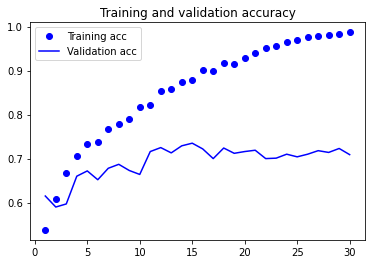

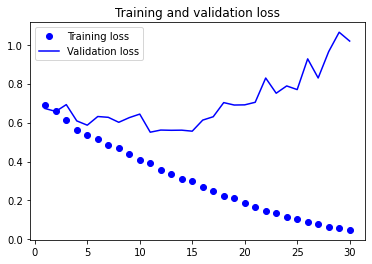

In [14]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

* 이 그래프는 과대적합의 특성을 보여 준다.
* 비교적 훈련 샘플의 수(2,000개)가 적기 때문에 과대적합이 가장 중요한 문제이다.
* 드롭아웃이나 가중치 감수(L2 규제)처럼 과대척합을 감수시킬 수 있는 여러 가지 기법들을 배웠다.
* 여기에서는 컴퓨터 비전에 특화되어 있어서 딥러닝으로 이미지를 다룰 때 매우 일반적으로 사용되는 새로운 방법인 **데이터 증식**을 시도해 본다.

### 데이터 증식 사용하기
* 과대적합은 학습할 샘플이 너무 적어 새로운 데이터에 일반화할 수 있는 모델을 훈련시킬 수 없기 때문에 발생한다.
* 무한히 많은 데이터가 주어지면 데이터 분포의 모든 가능한 측면을 모델이 학습할 수 있을 것이다.
* 데이터 증식은 기존 훈련 샘플로부터 더 많은 훈련 샘플로부터 더 많은 훈련 데이터를 생성하는 방법이다.
* 이 방법은 그럴듯한 이미지를 생성하도록 여러 가지 랜엄한 변환을 적용하여 샘플을 늘린다.

In [15]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

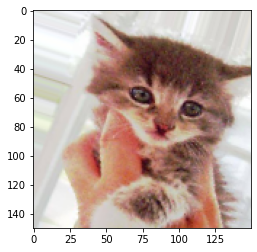

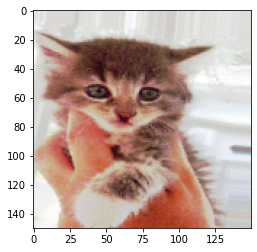

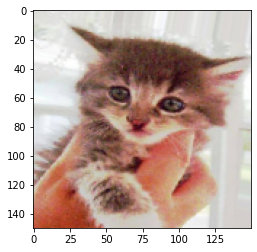

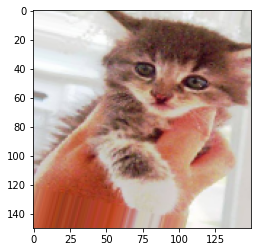

In [18]:
from tensorflow.keras.preprocessing import image

fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])

img_path = fnames[3]

img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

* 데이터 증식을 사용하여 새로운 네트워크를 훈련시킬 때 네트워크에 같은 입력 데이터가 두 번 주입되지 않는다.
* 하지만 적은 수의 원본 이미지에서 만들어졌기 때문에 여전히 입력 데이터들 사이에 상호 연관성이 크다.
* 즉 새로운 정보를 만들어 낼 수 없고 단지 기존 정보의 재조합만 가능하다.
* 그렇기 때문에 완전히 과대적합을 제거하기에 충분하지 않을 수 있다.
* 과대적합을 더 억제하기 위해 완전 연결 분류기 직전에 Dropout 층을 추가한다.

In [19]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(lr=1e-4),
    metrics=['acc']
)

c:\Users\posky\anaconda3\envs\tf20\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [21]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary'
)

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=num_validation // batch_size
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100


C:\Users\posky\AppData\Local\Temp\ipykernel_16840\156171371.py:27: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


100/100 [==============================] - 9s 87ms/step - loss: 0.6957 - acc: 0.5120 - val_loss: 0.6888 - val_acc: 0.5130
Epoch 2/100
100/100 [==============================] - 9s 94ms/step - loss: 0.6887 - acc: 0.5460 - val_loss: 0.6962 - val_acc: 0.5000
Epoch 3/100
100/100 [==============================] - 9s 86ms/step - loss: 0.6816 - acc: 0.5620 - val_loss: 0.6834 - val_acc: 0.5220
Epoch 4/100
100/100 [==============================] - 8s 84ms/step - loss: 0.6715 - acc: 0.5750 - val_loss: 0.6912 - val_acc: 0.5570
Epoch 5/100
100/100 [==============================] - 9s 87ms/step - loss: 0.6669 - acc: 0.5845 - val_loss: 0.6397 - val_acc: 0.6280
Epoch 6/100
100/100 [==============================] - 9s 88ms/step - loss: 0.6516 - acc: 0.6120 - val_loss: 0.6312 - val_acc: 0.6330
Epoch 7/100
100/100 [==============================] - 9s 87ms/step - loss: 0.6500 - acc: 0.6080 - val_loss: 0.6113 - val_acc: 0.6560
Epoch 8/100
100/100 [==============================] - 9s 86ms/step - loss

In [24]:
model.save('cats_and_dogs_small_2.h5')

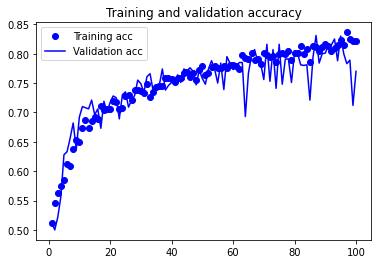

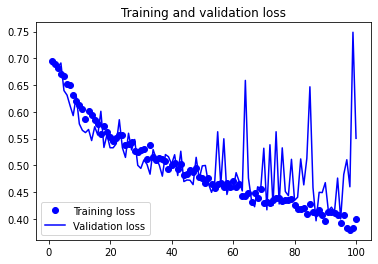

In [25]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

* 다른 규제 기법을 더 사용하고 네트워크의 파라미터를 튜닝하면(합성곡 층의 필터 수나 네트워크 층의 수 등) 더 높은 점확도를 얻을 수도 있다.
* 하지만 데이터가 적기 때문에 컨브넷을 처음부터 훈련해서 더 높은 정확도를 달성하기는 어렵다.
* 이런 상황에서 정확도를 높이기 위한 다음 단계는 사전 훈련된 모델을 사용하는 것이다.